# Zipf Law Revisited

In the earlier notebook we saw that the frequencies observed roughly obeyed Zipf's law...

However the fit tailed off towards the less frequent words, now we see that that is to be expected, and how to fix it.

## Biased estimators

What is the best estimate for a word's aymptotic frequency over a large enough sample size? The estimator we might reach for is one based on a sample, as we used in the previous notebook:

$$

\hat{f}(w_i) = \frac{C(w_i)}{|T|}

$$

Where $C$ is the count function, and $|T|$ the total size of the sample text.

In the absence of any underlying model for word frequencies, this does seem fair. However we know that all words do occur with non-zero frequency (otherwise why would they be in a dictionary?). Thus the estimator for an un-observed word, $\bar{w}_i$, $\hat{f}(\bar{w}_i) = 0$ must be biased, the law of total probability then means that our remaining estimators are also biased - or at least a subset of them are.

## Survivorship bias

Intuitively this is due to a survivorship bias - if the expected number of occurences of a word in the sample text is, say $0.5$, then due to the discrete nature of the count function $C : \{ w_i \in W \} \to \mathbb{N}$, we must either under or overestimate it's frequency - and all the observed words like this will be overestimated, conversely for the un-observed words.

## Key Ideas

So what can be do about this? It seems we need to adjust our estimates, especially for words only observed a handful of times. That does align with the break-away from the theory we saw in the previous notebook's graphs. To solve this problem we rely on the following key observations:

1. The number of words we **didn't** observe is also a valuable piece of information
2. Above a certain number of observations, a word's frequency estimate is essential **unbiased**
3. We have a well backed theory for the qualititative relationship frequencies obey, as a function of word rank
4. Using our sample statistics to estimate orderings is **not** subject to bias
5. Estimating rank and ordering are not the same thing

We observe a subtle distinction here, that is worth repeating. Whilst we cannot use $\hat{f}$ to estimate the frequencies we require, we can use it as a unbiased estimate for the ordering of the words by frequency. Then we need to consider the even subtler distinction between rank and order. We now discuss each point.


### Technical notes

"bias" according to the traditional definition is being used incorrectly here. In fact $\hat{f}$ **is** unbiased as our sample size grows to infinity. However Zipf scores are used to discuss occurences of rare words in the region of 10 per billion - talking about asymptotics would require data volumes well beyond the current system can produce.

To formalise this rigorously we would need to consider a dictionary that grows with the sample size, so we always anticipate unseen words. However that means we have a changing data distribution, and would require much more advanced tools - and tangential considerations not helpful for actually solving our present issue.

### 1. Unobserved words

let $T$ be a text distributed according the global Zipf-Mandelbrot law. We let

$$ N = |T| $$ 

be the number of words, (counting repetitions) present in $T$, and 

$$M = | \text{dictionary} |$$

the number of *unique* words we drew from in sampling $T$. We are interested in the following quantity:

$$ U = | \{ w_i | w_i \notin T \} |$$

The total number of unseen words. Given a text, we can trivially exactly compute this - however there is also the following estimator for a given $M$:

$$ \hat{U} = | \text{dictionary} | - \mathbb{E}[\text{unique}] = \mathbb{E} \left[ M - \sum_{w_i} I_i \right]$$

Where $I_i$ is the indicator variable for the event "word $i$ present in $T$", these are not necessarily indepedant random variables, but the linearity of expectation applies nontheless:

$$ \hat{U} = M - \sum_{w_i} \mathbb{E}(I_i) = M - \sum_{w_i} \left(  1 - (1-f(w_i))^M \right) = \sum_{w_i} (1-f(w_i))^M $$

I.e. using the probability that $I_i = 0$, the word was never observed, to estimate the expectation. Here $f$ is the true frequency per word, thus equivalent to the probability any given sampled word in the text is $w_i$.


Taking step back, we see we have derived a formula for an quantity we already know, $U$ ...however the right hand side is interesting, because while know the qualitative shape of $f$, the parameters are unknowns to be fitted - and now we have an extra piece of information to help that, from words that we have never even seen!


### 2. When do we get bias?

We know bias arises from survivorship of a word $w_i$ observed in the text; we do not have any information about the counterfactual - that the text did not contain $w_i$

So how likely was that? lets do a quick case study with a word, that asymptotically had $0.5$ expected occurences in $T$, but we observed it $n$ times:

#### $n = 1$

This case is likely:

$$ \mathbb{P}(n = 1) = {N \choose 1} \cdot \left( \frac{0.5}{N}\right)^1 \cdot \left( 1 - \frac{0.5}{N}\right)^{N-1} \geq N \cdot \frac{0.5}{N} \cdot \left( 1 - (N-1)\frac{0.5}{N}\right)$$

By the Binomial inequality, thus:

$$
 \mathbb{P}(n = 1) \geq 0.25
$$

Definitely worth considering

#### $n = 10$

$$ \mathbb{P}(n = 10) = {N \choose 10} \cdot \left( \frac{0.5}{N}\right)^{10} \cdot \left( 1 - \frac{0.5}{N}\right)^{N-10} \leq {N \choose 10} \cdot \left( \frac{0.5}{N}\right)^{10} $$

Thus 
$$
\mathbb{P}(n = 10) \leq N \cdot (N-1) \dots (N-10) \cdot \left( \frac{0.5}{N}\right)^{10} \leq N^{10} \cdot \left( \frac{0.5}{N}\right)^{10}
$$

$$
\mathbb{P}(n = 10) \leq 0.5^{10}
$$

A rough upper bound, already severly unlikely, a full analysis of the likelihood that $f(w_i) = 0.5$ given 10 occurences would require some Bayesian reasoning, but regardless it is clear that the effects of survivorship bias are minimal given sufficient observations of a word.

Intuitively, for a word with 10 observations, this is just as likely to be an undersample as an oversample - whereas with 1 observation, we should be considering survivorship bias.


Going the other way, considering the a word with 10 expected occurences, and its survival likelihood. For large $ M $, the Binomial distribution approximates a Poisson distribution with mean $\lambda $, leading to:

$$
\mathbb{P}(n = 0) \approx e^{-\lambda}.
$$

Substituting $\lambda = 10 $, we obtain:

$$
\mathbb{P}(n = 0) \approx e^{-10}.
$$

Numerically,

$$
e^{-10} \approx 4.54 \times 10^{-5}.
$$

Thus, the probability that a word with an expected frequency of 10 in a text of size $ M $ never appears is approximately $4.54 \times 10^{-5}$ which is very small. Thus the event we didn't observe the word can safely be ignored, and adds minimal bias to our estimate.

To conclude - our estimates for frequencies are decent once we have enough data, this will prove useful in the next point.

### 3. A qualitative model for frequency

Previously we introduced the Zipf-Mandelbrot model:

$$
\text{Frequency} = \frac{c}{(\text{rank} + b)^a}
$$

With fittable parameters $a,b,c$ - we assume this to be true. Then given 2., we can be happy with a fit based on data filtering out the infrequent obervations.

The problem is that now we have a large extrapolation... if only we had a way to tune the long range effects of $a$, based on unbiased data. Well 1. gives us precisely that capability.


### 4. Estimating order

Our recorded frequencies give us a natural partial ordering, and we observe that changing this would not make any sense. Even if we know that an observed word probably shouldn't have been observed - that doesn't mean we should order an unobserved work above it.

As a discrete object (the ordering could be a matrix of 1s, 0s, 0.5s) we have an unbiased estimate of the true ordering (a matrix of 0s and 1s say)

### 5. Why Rank matters

Every order gives a natural function to the integers to yield the rank of a word, ready to be plugged into our model from 3.

We might be tempted to conclude from 4. that we have an unbiased estimator for this... however following this reasoning we arrive at contradictions. (ignoring the fact that the rank function is not even neccessarily well defined)

A key observation is that an estimator of rank merely maps:

$$
\hat{r} : \text{dictionary} \to \mathbb{R}
$$

And that we can then extract a partial/total ordering naturally, the Zipf-Mandelbrot model conflates these two because strictly* monotonic rank functions form equivalence classes with natural representatives: the pullback from the integer valued orders' indices (*i.e.when we have a total ordering)

But with a partial ordering, many different rank functions can yield the same partial ordering, and it is not obvious where to set the estimator value for, say, all the words we observed exactly 3 times.

We assume that this rank is constant for all these words - which is necessary anyway viewing the $\hat{r}$ as defining a partial order. 

We can then use 4. and consider the *order-range* we are covering, since our ordering is valid. Using our Zipf-Mandelbrot model, we can compute the probability mass present in this range, then divide it equally between the words, then work backwards to get our $\hat{r}$ estimate.

This approach ties together the ideas we've considered, and should lead to a much better fit, when we only have a limited sample size.

## Implementing the new approach

Now we apply this to our current data - the word frequencies of the first few chapters of Moby Dick. The dictionary we are using has 176048 definitions (since we count each word sense as a separate meaning)

Lets see how the model looks when we readjust for survivorship bias.

In [75]:
import pandas as pd

file_path = "/mnt/c/Users/Matt/source/repos/Linguine/Linguine/bin/Debug/net8.0-windows10.0.19041.0/freqs.csv"  # Change this if needed
df = pd.read_csv(file_path)

df["Frequency"] = pd.to_numeric(df["Frequency"], errors="coerce")

df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

df["Rank"] = df.index + 1

df.head()

,Word,Frequency,Definition,Rank
0,the,405,A word placed before nouns to limit or individ...,1
1,a,271,"""An adjective, commonly called the indefinite ...",2
2,and,237,"""A particle which expresses the relation of co...",3
3,be,152,"""To exist actually, or in the world of fact; t...",4
4,to,150,"""The preposition to primarily indicates approa...",5


In [32]:
freq_df = df[df["Frequency"] >= 10]

In [33]:
freq_df.sample(5)

,Word,Frequency,Definition,Rank
64,first,13,"""Preceding all others of a series or kind; the...",65
23,go,28,"""To pass from one place to another; to be in m...",24
67,most,13,Consisting of the greatest number or quantity;...,68
72,these,12,The plural of this. See This.,73
24,do,26,"""To perform, as an action; to execute; to tran...",25


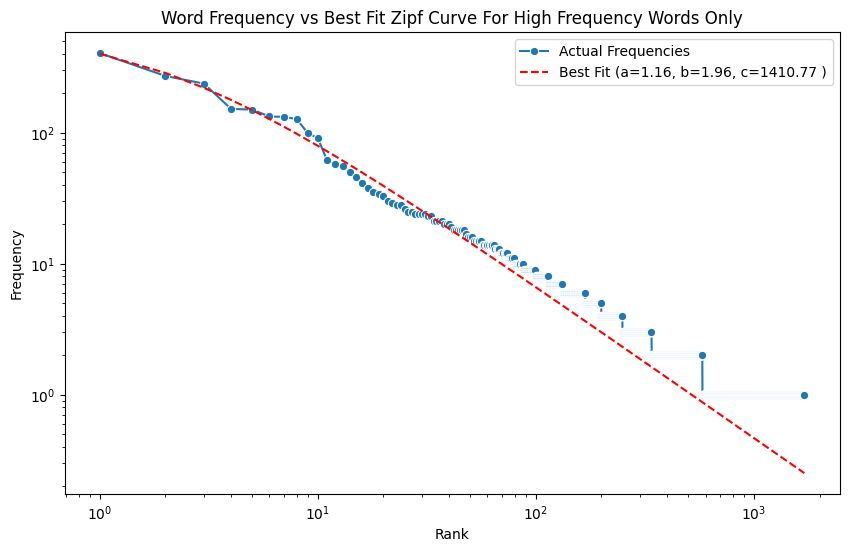

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Zipf-Mandelbrot
def zipf_func(rank, a, b, c):
    return c / ((rank + b) ** a)

# Fit the curve using non-linear least squares
popt, _ = curve_fit(zipf_func, freq_df["Rank"], freq_df["Frequency"], maxfev=10000)

# Get best-fit parameters
a_opt, b_opt, c_opt = popt

# Generate fitted Zipf-like values
df["Zipf_Fit"] = zipf_func(df["Rank"], a_opt, b_opt, c_opt)

# Plot actual frequencies vs Zipf's Law fit
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Rank"], y=df["Frequency"], label="Actual Frequencies", marker="o")
sns.lineplot(x=df["Rank"], y=df["Zipf_Fit"], label=f"Best Fit (a={a_opt:.2f}, b={b_opt:.2f}, c={c_opt:.2f} )", linestyle="dashed", color="red")

# Log-log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency vs Best Fit Zipf Curve For High Frequency Words Only")
plt.legend()

# Show plot
plt.show()

In [35]:
unseen_count = 176048 - df.shape[0] 
print(f"words unseen in sample: {unseen_count}")

sample_size = df['Frequency'].sum()
print(f"sample size: {sample_size}")

words unseen in sample: 174344
sample size: 6166


### Numerical stability

We have that our estimator of the number of unseen words is:

$$ \hat{U} = \sum_{w_i} (1-f(w_i))^M $$

This will be prone to numerical instability unless we work in log space, so

$$
\hat{U} = \sum_{w_i} \exp \left( M \log{(1-f(w_i))} \right)
$$

we shoul use long double precision for this all.

In [45]:
df.shape[0]

1704

In [38]:
from tqdm import tqdm

M = df["Frequency"].sum()
u_hat = 0.0

for i in tqdm(range(1,176048+1)):
    p_i = (c_opt / 6166) / np.power(i + b_opt, a_opt)
    p_not_i = (1.0 - p_i)
    p_never_i = np.exp(M * np.log(p_not_i))
    u_hat += p_never_i

100%|███████████████████████████████████████████████████████████████████████| 176048/176048 [00:01<00:00, 117793.52it/s]


In [44]:
print(f"predicted unseen: {u_hat:0f}")
print(f"true unseen: {unseen_count}")
print(f"rel err: {np.abs((u_hat - unseen_count) / unseen_count) * 100.0:0f}%")

predicted unseen: 173796.784948
true unseen: 174344
rel err: 0.313871%


This is pretty accurate! we are off by about 500, which we can definitely tune for now with the $a$ parameter. I expect this to be convex, so will use the golden search algorithm.

In [54]:
a_opt

1.1596880569846144

In [58]:
def compute_u_hat(a_opt, b_opt, c_opt, M, U, max_iter=100, tol=1e-6):
    """
    Computes u_hat for a given c_opt and returns the absolute difference from U.
    """
    u_hat = 0.0
    for i in range(1, 176048 + 1):
        p_i = (c_opt / M) / np.power(i + b_opt, a_opt)
        p_not_i = (1.0 - p_i)
        p_never_i = np.exp(M * np.log(p_not_i))
        u_hat += p_never_i
    return abs(U - u_hat)

def golden_section_search(a, b, b_opt, c_opt, M, U, tol=1e-6, max_iter=100):
    """
    Performs golden section search to find optimal c_opt.
    """
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    resphi = 2 - phi
    
    a1 = a + resphi * (b - a)
    a2 = b - resphi * (b - a)
    
    f1 = compute_u_hat(a1, b_opt, c_opt, M, U)
    f2 = compute_u_hat(a2, b_opt, c_opt, M, U)
    
    for _ in tqdm(range(max_iter)):
        if abs(b - a) < tol:
            break
        
        if f1 < f2:
            b = a2
            a2 = a1
            f2 = f1
            a1 = a + resphi * (b - a)
            f1 = compute_u_hat(a1, b_opt, c_opt, M, U)
        else:
            a = a1
            a1 = a2
            f1 = f2
            a2 = b - resphi * (b - a)
            f2 = compute_u_hat(a2, b_opt, c_opt, M, U)
    
    return (a1 + a2) / 2

# Example usage
a_opt_initial_low = 0.9 # Lower bound for search
a_opt_initial_high = 3.0  # Upper bound for search
optimal_a = golden_section_search(a_opt_initial_low, a_opt_initial_high, b_opt, c_opt, M, unseen_count)
print("Optimal a_opt:", optimal_a)

 31%|█████████████████████████▍                                                        | 31/100 [00:26<00:58,  1.19it/s]

Optimal a_opt: 1.2007510892331217


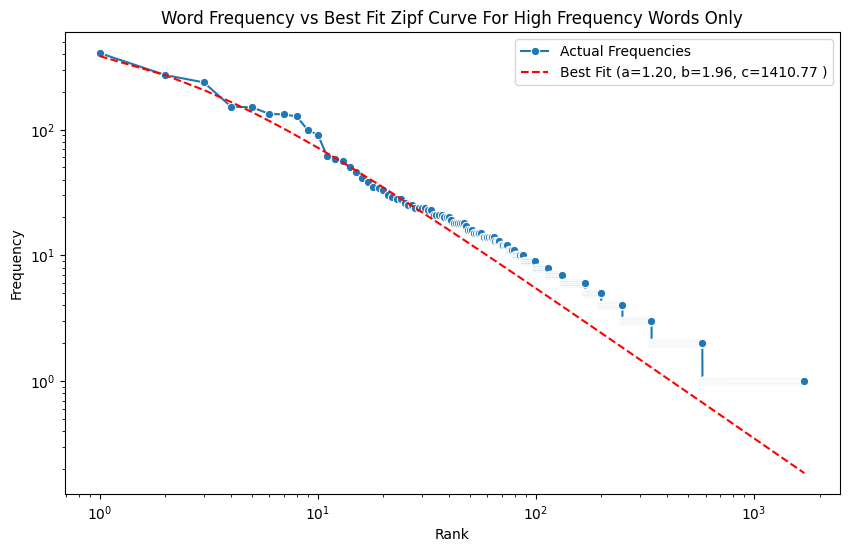

In [60]:
df["Zipf_Fit"] = zipf_func(df["Rank"], optimal_a, b_opt, c_opt)

# Plot actual frequencies vs Zipf's Law fit
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Rank"], y=df["Frequency"], label="Actual Frequencies", marker="o")
sns.lineplot(x=df["Rank"], y=df["Zipf_Fit"], label=f"Best Fit (a={optimal_a:.2f}, b={b_opt:.2f}, c={c_opt:.2f} )", linestyle="dashed", color="red")

# Log-log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency vs Best Fit Zipf Curve For High Frequency Words Only")
plt.legend()

# Show plot
plt.show()

In [61]:
df

,Word,Frequency,Definition,Rank,Zipf_Fit
0,the,405,A word placed before nouns to limit or individ...,1,383.303595
1,a,271,"""An adjective, commonly called the indefinite ...",2,270.250301
2,and,237,"""A particle which expresses the relation of co...",3,206.229309
3,be,152,"""To exist actually, or in the world of fact; t...",4,165.414634
4,to,150,"""The preposition to primarily indicates approa...",5,137.305659
...,...,...,...,...,...
1699,bring,1,To convey to the place where the speaker is or...,1700,0.186162
1700,piece,1,"""A fragment or part of anything separated from...",1701,0.186031
1701,shoulder,1,"""The joint, or the region of the joint, by whi...",1702,0.185899
1702,gloom,1,Cloudiness or heaviness of mind; melancholy; a...,1703,0.185769


In [76]:
df["Modeled_Frequency"] = c_opt / ((df["Rank"] + b_opt) ** optimal_a)

mean_modeled_freq = df.groupby("Frequency")["Modeled_Frequency"].mean()
# df = df.merge(mean_modeled_freq, on="Frequency", suffixes=("", "_Mean"))

df


,Word,Frequency,Definition,Rank,Modeled_Frequency
0,the,405,A word placed before nouns to limit or individ...,1,383.303595
1,a,271,"""An adjective, commonly called the indefinite ...",2,270.250301
2,and,237,"""A particle which expresses the relation of co...",3,206.229309
3,be,152,"""To exist actually, or in the world of fact; t...",4,165.414634
4,to,150,"""The preposition to primarily indicates approa...",5,137.305659
...,...,...,...,...,...
1699,bring,1,To convey to the place where the speaker is or...,1700,0.186162
1700,piece,1,"""A fragment or part of anything separated from...",1701,0.186031
1701,shoulder,1,"""The joint, or the region of the joint, by whi...",1702,0.185899
1702,gloom,1,Cloudiness or heaviness of mind; melancholy; a...,1703,0.185769


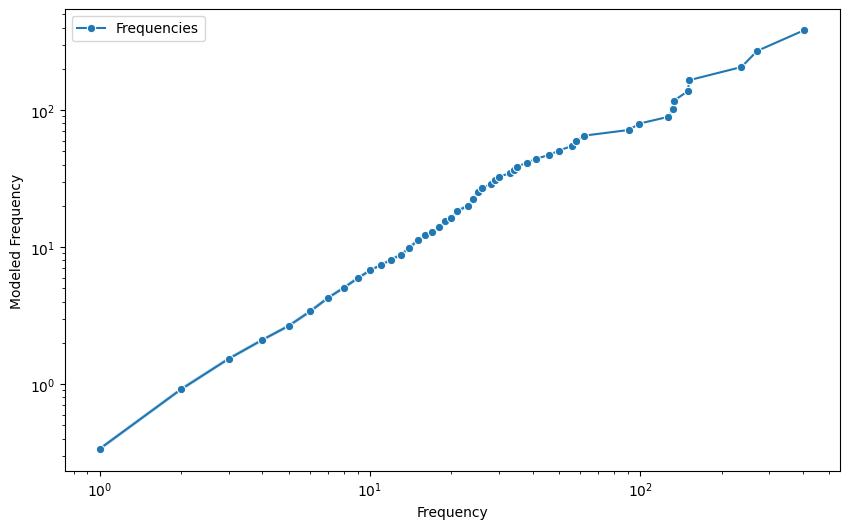

In [80]:

# Plot actual frequencies vs Zipf's Law fit
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Frequency"], y=df["Modeled_Frequency"], label="Frequencies", marker="o")

# Log-log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Modeled Frequency")
plt.legend()

# Show plot
plt.show()

We see now a much more linear relationship.

In [ ]:
df.iloc[1701]["Definition"]

'"The joint, or the region of the joint, by which the fore limb is connected with the body or with the shoulder girdle; the projection formed by the bones and muscles about that joint."'

In [83]:
df.iloc[1701]

Word                                                          shoulder
Frequency                                                            1
Definition           "The joint, or the region of the joint, by whi...
Rank                                                              1702
Modeled_Frequency                                             0.185899
Zipf_Fit                                                    563.979102
Name: 1701, dtype: object

In [87]:
1 / M

0.0001621796951021732

In [88]:
np.log10(1_000_000 * (1 / M)) + 3

5.209996479609511

In [89]:
np.log10(1_000_000 * (0.185 / M)) + 3

4.477168208012524

## Evaluation

Comparing the frequency score before and after adjustment - we see strong improvements, The true Zipf score for "shoulder" is 4.462, and the adjusted version was much closer to that than our previous overestimate

other examples:

"sleeve" : 3.882	

"piece" : 5.27

"gloom" : 3.604

In most of these cases the dowscore was beneficial, apart from "piece"